In [2]:
import json
import numpy as np
import os
%matplotlib inline
#%matplotlib notebook
from matplotlib import pyplot as plt
from astropy import table

In [3]:
nsnr =1000
navs = 2000

SNR_RVS = np.linspace(15, 150, nsnr)
sigma_of_DIB = 2 #angstroms
R_of_RVS=11500
DIB_wavelength = 8600 #angstroms
delta_x = DIB_wavelength/R_of_RVS
EW_per_Av = 0.1

Avs = np.linspace(0.1, 5, navs)

EWs = Avs*EW_per_Av
depths = EWs/(np.sqrt(2*np.pi)*sigma_of_DIB)


In [4]:
sigma_centroid = np.sqrt((2*(1/SNR_RVS[:, None])*sigma_of_DIB)/(delta_x*np.sqrt(np.pi)*depths[None, :]**2))

In [5]:
sigma_centroid.shape

(1000, 2000)

<a list of 4 text.Text objects>

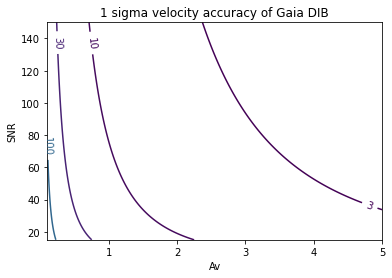

In [7]:
fig, ax = plt.subplots()
cs = ax.contour(Avs,SNR_RVS, sigma_centroid, levels=[1, 3, 10, 30, 100, 300])
ax.set_ylabel('SNR')
ax.set_xlabel('Av')
ax.set_title('1 sigma velocity accuracy of Gaia DIB')
cs.clabel([1, 3, 10, 30, 100, 300])